In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import CM4Xutils
CM4Xutils.__version__

'0.4.1'

In [5]:
import warnings
import dask
import xarray as xr
import xwmt
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [6]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

## Density-bin and coarsen diagnostics

In [9]:
ds = remap_budgets_to_sigma2_and_coarsen("CM4Xp25", 2000)
display(ds)

Loading CM4Xp25-piControl for interval `2000`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp25-historical for interval `2000`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp25 grid coordinates from supergrid.
Regridding ice
Inferring Z grid coordinate: depth `z_`
Inferring Z grid coordinate: density `sigma2`


<xarray.Dataset> Size: 79GB
Dimensions:                         (exp: 2, time: 60, yh: 180, xh: 240,
                                     sigma2_l: 74, time_bounds: 61, xq: 241,
                                     yq: 181, sigma2_i: 75)
Coordinates: (12/30)
  * exp                             (exp) object 16B 'forced' 'control'
  * time                            (time) object 480B 2000-01-16 12:00:00 .....
    time_since_init                 (time) object 480B dask.array<chunksize=(60,), meta=np.ndarray>
    geolon                          (yh, xh) float64 346kB dask.array<chunksize=(180, 240), meta=np.ndarray>
    lon                             (yh, xh) float64 346kB dask.array<chunksize=(180, 240), meta=np.ndarray>
    geolat                          (yh, xh) float64 346kB dask.array<chunksize=(180, 240), meta=np.ndarray>
    ...                              ...
  * xh                              (xh) int64 2kB 0 1 2 3 4 ... 236 237 238 239
  * yh                              (yh) int64 1kB 0 1 2 3 4 ... 176 177 178 179
  * xq                              (xq) int64 2kB 0 1 2 3 4 ... 237 238 239 240
  * yq                              (yq) int64 1kB 0 1 2 3 4 ... 177 178 179 180
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>
Data variables: (12/54)
    thkcello                        (exp, time, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    thkcello_bounds                 (exp, time_bounds, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    S_advection_xy                  (exp, time, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    T_advection_xy                  (exp, time, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    Th_tendency_vert_remap          (exp, time, sigma2_l, yh, xh) float32 2GB dask.array<chunksize=(2, 1, 74, 180, 240), meta=np.ndarray>
    ...                              ...
    taux                            (exp, time, yh, xh) float64 41MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
    tauy                            (exp, time, yh, xh) float64 41MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
    tos                             (exp, time, yh, xh) float32 21MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
    zos                             (exp, time, yh, xh) float32 21MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float32 21MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float32 21MB dask.array<chunksize=(2, 1, 180, 240), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z.200001-200412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p25
    associated_files:    areacello: 20000101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello
    model:               CM4Xp25
    description:         The CM4Xp25 experimental design following Griffies e...
    provenance:          Diagnostics have been conservatively remapped into m...

#### Confirmation that sea ice melt flux is correctly separated from liquid precipitation

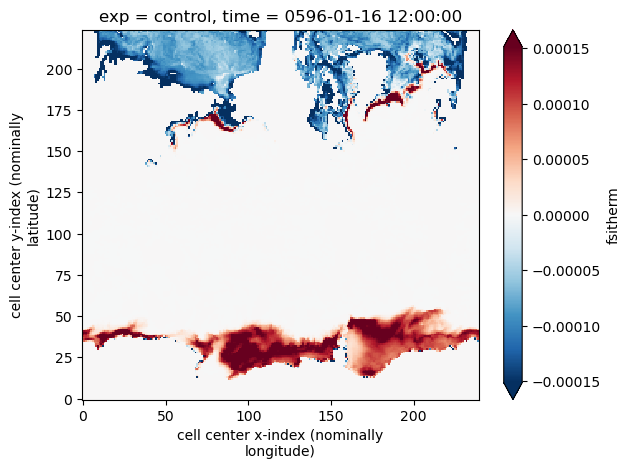

In [17]:
ds["fsitherm"].isel(exp=0, time=0).sum("sigma2_l").plot(robust=True)

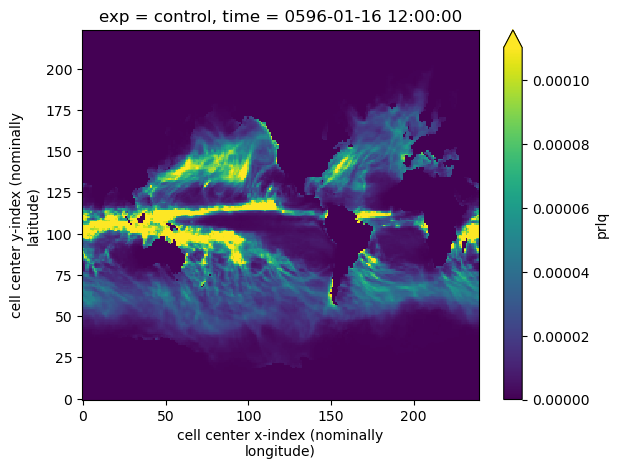

In [18]:
ds["prlq"].isel(exp=0, time=0).sum("sigma2_l").plot(robust=True)

#### Confirmation that shortwave absorption has been correctly derived from flux diagnostic

In [19]:
rsdoabsorb_example = ds["rsdoabsorb"].isel(exp=0, time=0).compute()

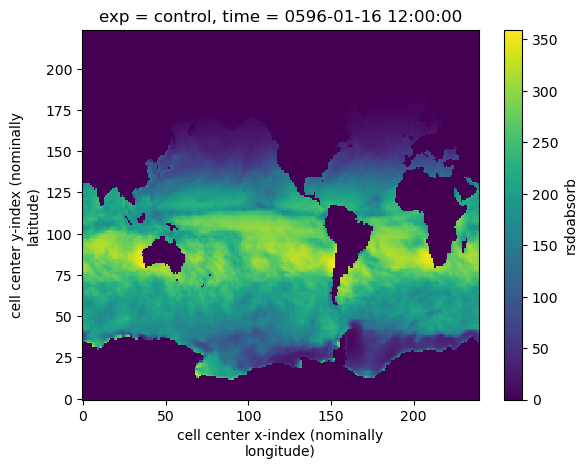

In [20]:
rsdoabsorb_example.sum("sigma2_l").plot()

#### Confirmation that flux convergences due to individual processes are consistent with the total heating of a density layer

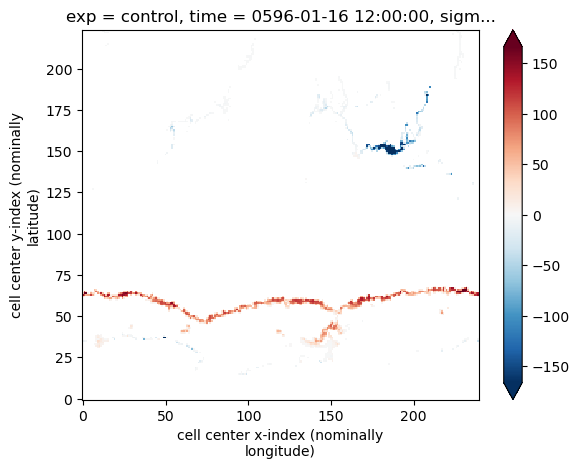

In [21]:
(ds["hflso"] + ds["hfsso"] + ds["rlntds"] + ds["rsdoabsorb"]).isel(exp=0, time=0).sel(sigma2_l=35.75, method="nearest").plot(robust=True)

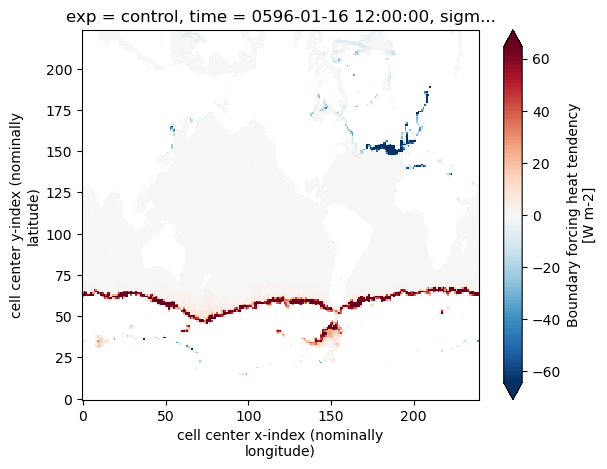

In [22]:
(ds["boundary_forcing_heat_tendency"]).isel(exp=0, time=0).sel(sigma2_l=35.75, method="nearest").plot(robust=True)

#### Confirmation that wind stress and SSH fields have been correctly coarsened

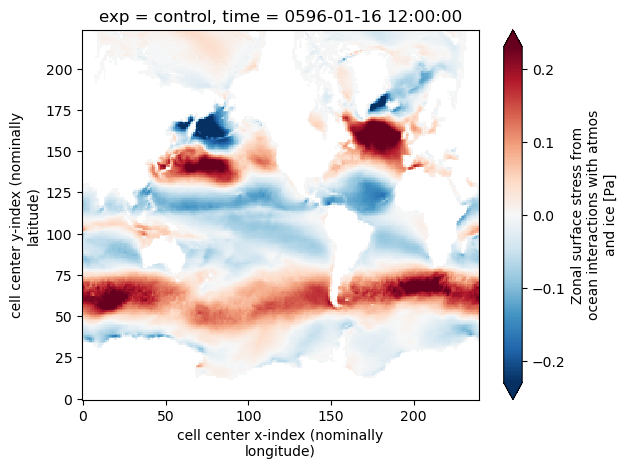

In [23]:
ds["taux"].isel(exp=0, time=0).plot(robust=True)

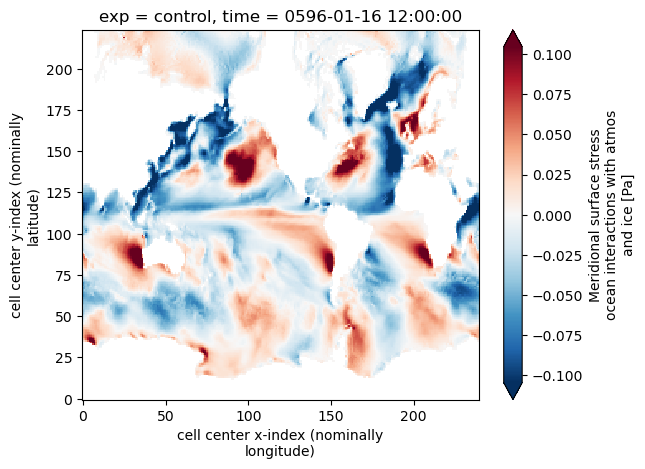

In [24]:
ds["tauy"].isel(exp=0, time=0).plot(robust=True)

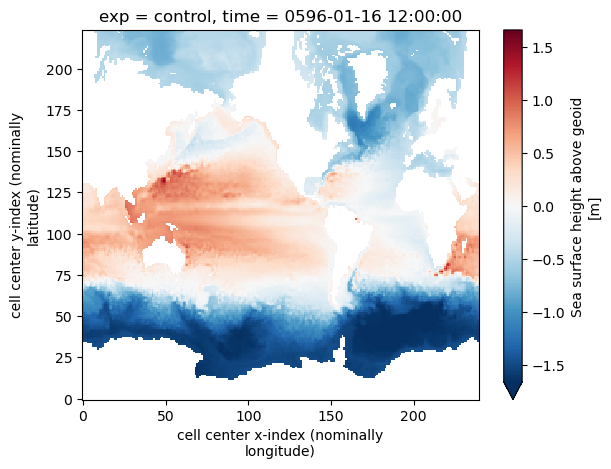

In [25]:
ds["zos"].isel(exp=0, time=0).plot(robust=True)

#### Confirmation of the discrete divergence theorem: that coarsened fluxes are consistent with coarsened flux-convergences

In [11]:
import xgcm
coords={
    'X': {'center': 'xh',  'outer': 'xq'},
    'Y': {'center': 'yh',  'outer': 'yq'},
    'Z': {'center': 'sigma2_l', 'outer': 'sigma2_i'},
}
metrics = {
    ('X', 'Y'): ['areacello']
}
grid = xgcm.Grid(
    ds,
    coords=coords,
    metrics=metrics,
    boundary={"X":"periodic", "Y":"extend", "Z":"extend"},
    autoparse_metadata=False
)

In [17]:
vertically_integrated_mass_conv_from_fluxes = -(
    grid.diff(ds.umo.fillna(0.), "X") +
    grid.diff(ds.vmo.fillna(0.), "Y")
).sum("sigma2_l")

vertically_integrated_mass_conv = (
    ds.dynamics_h_tendency.fillna(0.) * 
    ds.areacello *
    1035.
).sum("sigma2_l")

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


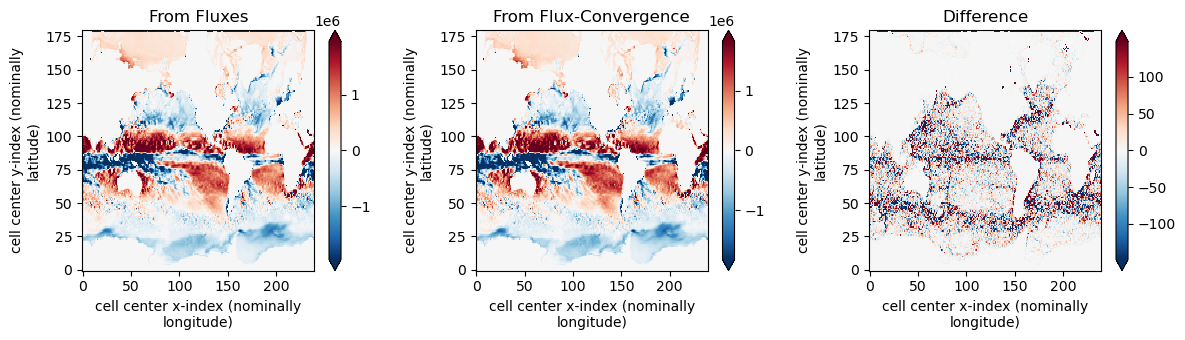

In [19]:
plt.figure(figsize=(12, 3.5))
plt.subplot(1,3,1)
vertically_integrated_mass_conv_from_fluxes.isel(exp=0, time=0).plot(robust=True)
plt.title("From Fluxes")

plt.subplot(1,3,2)
vertically_integrated_mass_conv.isel(exp=0, time=0).plot(robust=True)
plt.title("From Flux-Convergence")

plt.subplot(1,3,3)
(
    vertically_integrated_mass_conv_from_fluxes.isel(exp=0, time=0) -
    vertically_integrated_mass_conv.isel(exp=0, time=0)
).plot(robust=True)
plt.title("Difference")
plt.tight_layout()